In [1]:
!pip install opencv-python-headless numpy matplotlib


In [2]:
clear

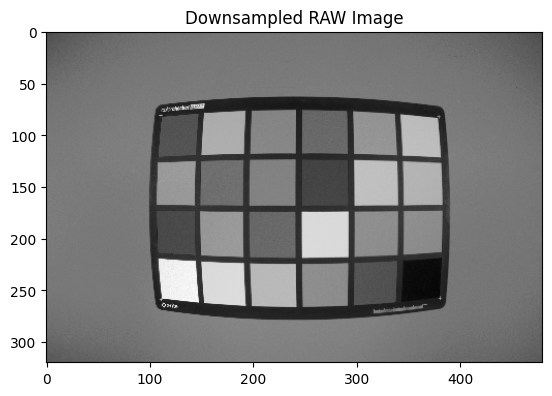

Downsampled Image shape: (320, 480)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define image dimensions and Bayer pattern
width = 1920
height = 1280
file_path = "C:/Users/Anant/Desktop/IPS/img/1920x1280x12bitsxGRBG_6500K_2000Lux.raw"

# Step 1: Load RAW data as a 1D array of 16-bit unsigned integers (since 12-bit images are often stored in 16-bit format)
with open(file_path, 'rb') as f:
    raw_data = np.fromfile(f, dtype=np.uint16)

# Step 2: Reshape to match image dimensions (Note: adjust if necessary for specific Bayer pattern data arrangement)
raw_image = raw_data.reshape((height, width))

# Step 3: Display a downsampled version of the raw image for testing
downsampled_image = raw_image[::5, ::5]  # Take every 4th pixel to reduce size by 75% for quick testing

plt.imshow(downsampled_image, cmap='gray')
plt.title("Downsampled RAW Image")
plt.show()

print("Downsampled Image shape:", downsampled_image.shape)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1069..2715].


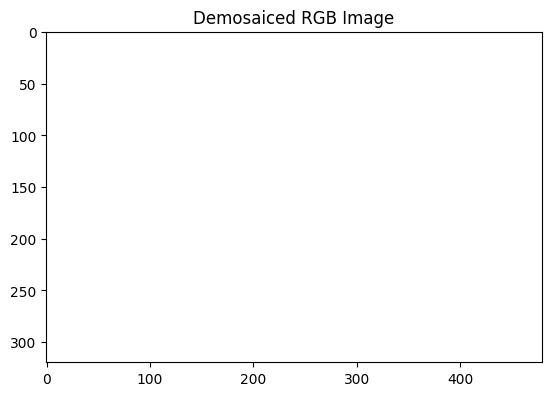

In [4]:
import cv2

# Convert the downsampled Bayer RAW image to an RGB image using OpenCV
demosaiced_image = cv2.cvtColor(downsampled_image, cv2.COLOR_BayerGR2RGB)

# Display the demosaiced image
plt.imshow(demosaiced_image)
plt.title("Demosaiced RGB Image")
plt.show()


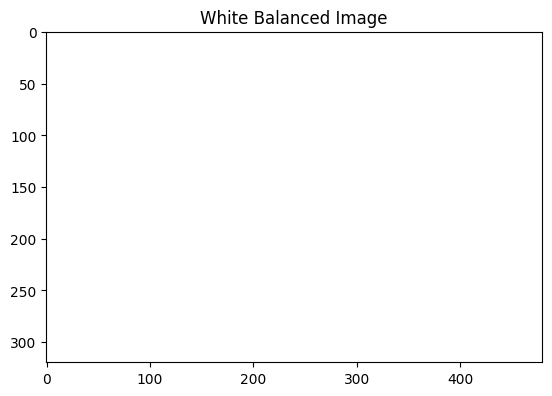

In [5]:
def white_balance(img):
    # Calculate the average intensity of each channel (R, G, B)
    avg_r = np.mean(img[:, :, 0])
    avg_g = np.mean(img[:, :, 1])
    avg_b = np.mean(img[:, :, 2])

    # Scale each channel so that the average is equal to the green channel's average
    img[:, :, 0] = np.clip(img[:, :, 0] * (avg_g / avg_r), 0, 255)
    img[:, :, 1] = np.clip(img[:, :, 1], 0, 255)
    img[:, :, 2] = np.clip(img[:, :, 2] * (avg_g / avg_b), 0, 255)
    
    return img

# Apply white balance
white_balanced_image = white_balance(demosaiced_image.astype(np.float32)).astype(np.uint8)

# Display the white-balanced image
plt.imshow(white_balanced_image)
plt.title("White Balanced Image")
plt.show()


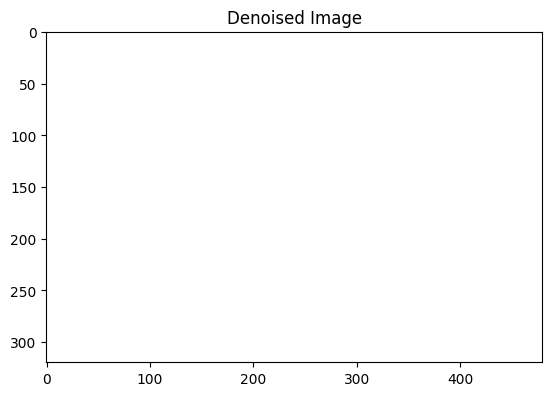

In [6]:
# Apply Gaussian blur for denoising
denoised_image = cv2.GaussianBlur(white_balanced_image, (5, 5), 0)

# Display the denoised image
plt.imshow(denoised_image)
plt.title("Denoised Image")
plt.show()


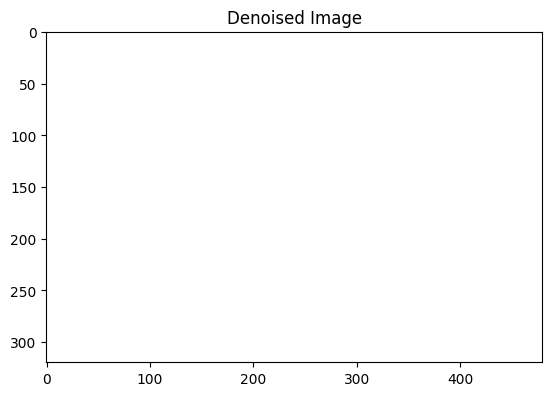

In [7]:
# Apply Gaussian blur for denoising
denoised_image = cv2.GaussianBlur(white_balanced_image, (5, 5), 0)

# Display the denoised image
plt.imshow(denoised_image)
plt.title("Denoised Image")
plt.show()


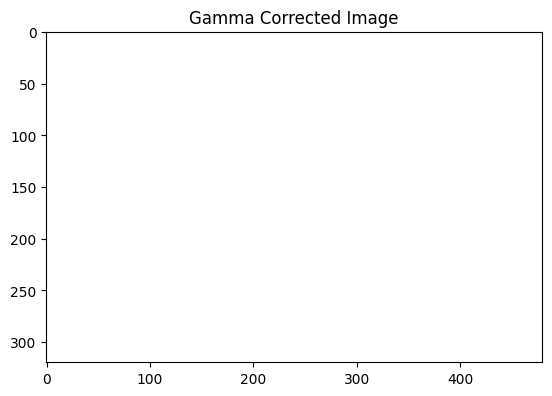

In [8]:
def gamma_correction(img, gamma=2.2):
    # Normalize the image to range 0-1
    img_normalized = img / 255.0
    # Apply gamma correction
    corrected_img = np.power(img_normalized, 1 / gamma)
    # Rescale to range 0-255
    return (corrected_img * 255).astype(np.uint8)

# Apply gamma correction
gamma_corrected_image = gamma_correction(denoised_image, gamma=2.2)

# Display the gamma-corrected image
plt.imshow(gamma_corrected_image)
plt.title("Gamma Corrected Image")
plt.show()


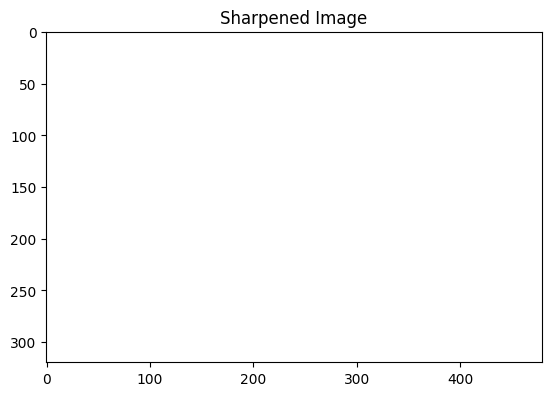

In [9]:
def unsharp_mask(img, strength=1.5, blur_size=(5, 5)):
    # Apply Gaussian blur to get the smooth version of the image
    blurred = cv2.GaussianBlur(img, blur_size, 0)
    # Combine the original image with the blurred version to enhance edges
    sharpened = cv2.addWeighted(img, 1 + strength, blurred, -strength, 0)
    return sharpened

# Apply unsharp mask for sharpening
sharpened_image = unsharp_mask(gamma_corrected_image, strength=1.5)

# Display the sharpened image
plt.imshow(sharpened_image)
plt.title("Sharpened Image")
plt.show()


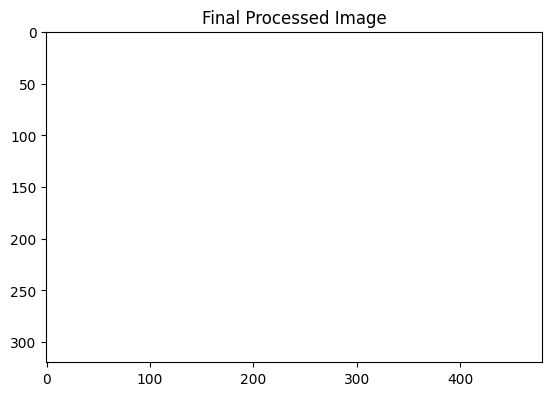

In [10]:
def process_image(raw_img):
    # Step 1: Demosaicing
    rgb_img = cv2.cvtColor(raw_img, cv2.COLOR_BayerGR2RGB)

    # Step 2: White Balance
    white_balanced_img = white_balance(rgb_img.astype(np.float32)).astype(np.uint8)

    # Step 3: Denoising
    denoised_img = cv2.GaussianBlur(white_balanced_img, (5, 5), 0)

    # Step 4: Gamma Correction
    gamma_corrected_img = gamma_correction(denoised_img, gamma=2.2)

    # Step 5: Sharpening
    final_img = unsharp_mask(gamma_corrected_img, strength=1.5)

    return final_img

# Run the complete processing pipeline
final_image = process_image(downsampled_image)

# Display the final processed image
plt.imshow(final_image)
plt.title("Final Processed Image")
plt.show()
